## SSB API : Hente inn tall fra ssb.no

Dette er et eksempel hvor vi henter inn tall for å følge lakseprisen fra ssb.no rett inn i vår egen kode

In [1]:
from pyjstat import pyjstat

In [2]:
import matplotlib.pyplot as plt

In [3]:
import requests ## trenger for http

URL spørringen skal postes mot. Selve URL-en vi kun gi metadata for tabellen. Her er tabellen eksport av laks

In [4]:
url = 'https://data.ssb.no/api/v0/no/table/03024'

JSON Spørring, siste 90 uker. Kan tas fra konsoll.

In [5]:
res = {
    "query": [
        {
            "code": "VareGrupper2",
            "selection": {
                "filter": "item",
                "values": ["01","02"]
            }
        },
        {
            "code": "ContentsCode",
            "selection": {
                "filter": "item",
                "values": ["Vekt", "Kilopris"]
            }
        },
        {
            "code": "Tid",
            "selection": {
                "filter": "top",
                "values": ["90"]
            }
        }
    ],
    "response": {
        "format": "json-stat2"
    }
}

In [6]:
resultat = requests.post(url, json = res)

In [7]:
# Print av resultat gir bare http statuskode. Den skal være 200 hvis OK
print(resultat)

<Response [200]>


In [8]:
dataset = pyjstat.Dataset.read(resultat.text)


In [9]:
df = dataset.write('dataframe') ## skriver til Pandas datasett (panel data i Python)

In [10]:
df.head() ## se på data

,varegruppe,statistikkvariabel,uke,value
0,Fersk oppalen laks,Vekt (tonn),2021U19,14863.0
1,Fersk oppalen laks,Vekt (tonn),2021U20,14746.0
2,Fersk oppalen laks,Vekt (tonn),2021U21,15977.0
3,Fersk oppalen laks,Vekt (tonn),2021U22,17993.0
4,Fersk oppalen laks,Vekt (tonn),2021U23,17277.0


In [11]:
df.tail(2)

,varegruppe,statistikkvariabel,uke,value
358,Frosen oppalen laks,Kilopris (kr),2023U03,92.93
359,Frosen oppalen laks,Kilopris (kr),2023U04,92.69


<AxesSubplot:xlabel='uke'>

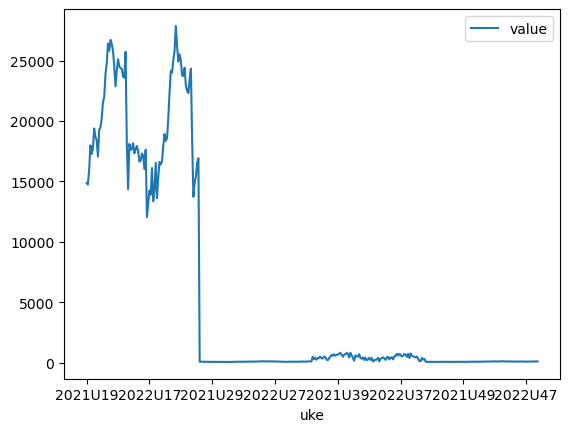

In [12]:
## Plot via Pandas 
df.plot(x='uke', y='value')

#### Dette fungerte dårlig av den grunnen at det er to ulike varegrupper her, og det er voldsom forskjell på vekt og pris

In [13]:
df_pris = df[df['statistikkvariabel'] == 'Kilopris (kr)']

varegruppe
Fersk oppalen laks     AxesSubplot(0.125,0.11;0.775x0.77)
Frosen oppalen laks    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

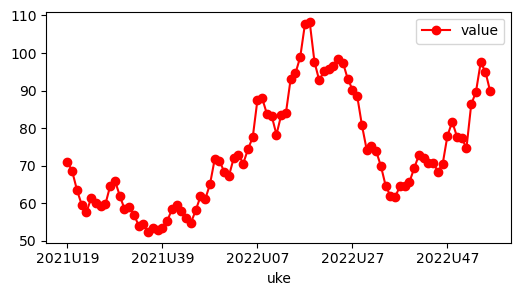

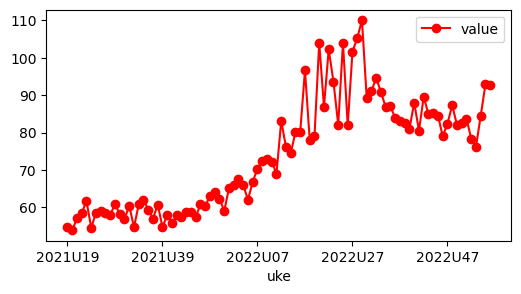

In [14]:
df_pris.groupby('varegruppe').plot(x='uke', y='value', marker="o", color="r", figsize=(6,3))

In [15]:
df_fersk = df_pris[df_pris['varegruppe'] == 'Fersk oppalen laks']

In [16]:
df_fersk

,varegruppe,statistikkvariabel,uke,value
90,Fersk oppalen laks,Kilopris (kr),2021U19,71.08
91,Fersk oppalen laks,Kilopris (kr),2021U20,68.48
92,Fersk oppalen laks,Kilopris (kr),2021U21,63.53
93,Fersk oppalen laks,Kilopris (kr),2021U22,59.59
94,Fersk oppalen laks,Kilopris (kr),2021U23,57.64
...,...,...,...,...
175,Fersk oppalen laks,Kilopris (kr),2022U52,86.33
176,Fersk oppalen laks,Kilopris (kr),2023U01,89.67
177,Fersk oppalen laks,Kilopris (kr),2023U02,97.51
178,Fersk oppalen laks,Kilopris (kr),2023U03,94.98


<AxesSubplot:xlabel='uke'>

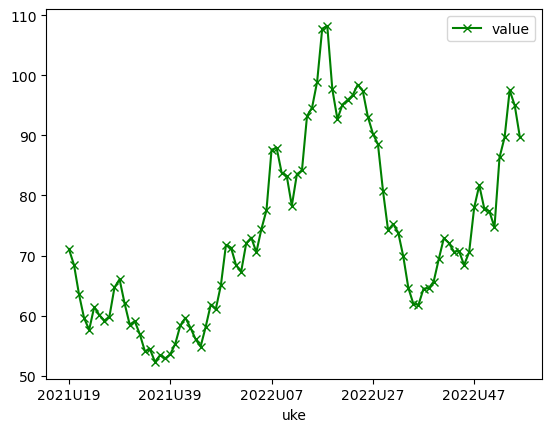

In [17]:
df_fersk.plot(x='uke', y='value', marker="x", color="g")


In [18]:
def visfigur(bredde=12, hoyde=6):
    fig, ax = plt.subplots(figsize=(bredde, hoyde))  
    #definerer ssb farger på figurene
    ssbCol = ['#1a9d49']
    plt.xlabel('uke') 
    plt.ylabel('pris')
    ax.set_title('Figur som viser utviklingen av laksepris for fersk laks')
    df_fersk.plot(ax=ax, color=ssbCol)
    plt.show()

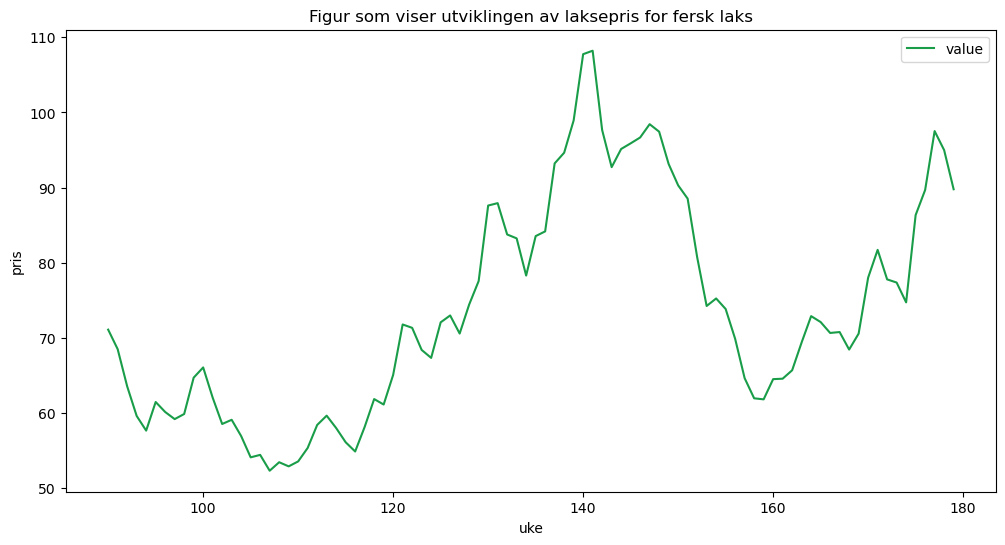

In [19]:
visfigur()